In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.preprocessing as sp
import itertools
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
data6 = pd.read_csv("6_Concrete_Slump_test/slump_test.data.txt")
# data10 = pd.read_csv("10_Akabane/akabane.csv")
%matplotlib inline
df = data6[["Cement", "Slag", "Fly ash", "SP", "Coarse Aggr.", "Fine Aggr.", "Fine Aggr.", "Compressive Strength (28-day)(Mpa)"]]

In [9]:
data6

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.00,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.00,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.00,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.00,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.00,64.0,26.82
5,6,147.0,89.0,115.0,202.0,9.0,860.0,829.0,23.00,55.0,25.21
6,7,152.0,139.0,178.0,168.0,18.0,944.0,695.0,0.00,20.0,38.86
7,8,145.0,0.0,227.0,240.0,6.0,750.0,853.0,14.50,58.5,36.59
8,9,152.0,0.0,237.0,204.0,6.0,785.0,892.0,15.50,51.0,32.71
9,10,304.0,0.0,140.0,214.0,6.0,895.0,722.0,19.00,51.0,38.46


In [10]:
for_moltiple_data = data6.drop(["No", "SLUMP(cm)", "FLOW(cm)"], axis=1)

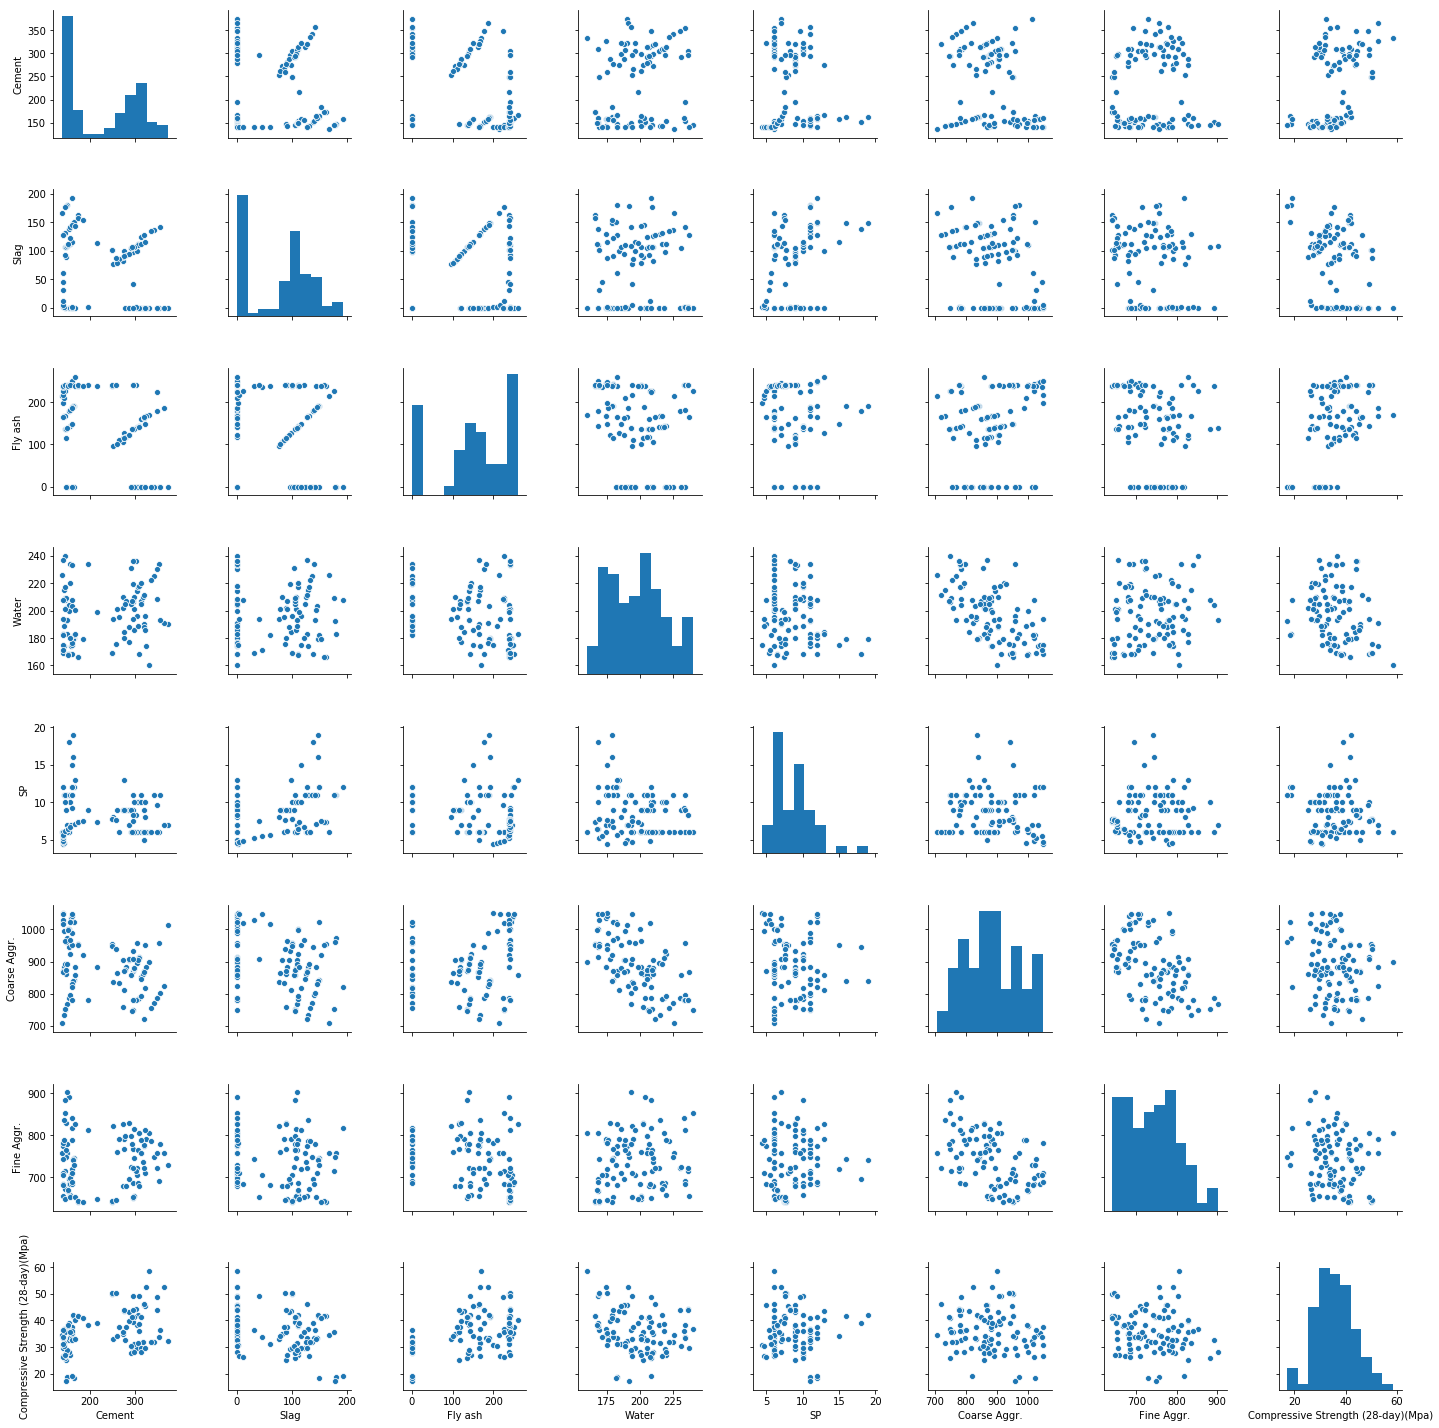

In [67]:
sns.pairplot(for_moltiple_data)
plt.show()

In [16]:
X = for_moltiple_data.iloc[:, :-1]
y = for_moltiple_data.iloc[:, -1]

model = sm.OLS(y, sm.add_constant(X))

# ラベル名を用いるときのモデルの設定 Construct a linear regression model
#model = smf.ols(formula = "damage ~ distance", data = data)

# 回帰分析の実行 Execute linear  regression 
results = model.fit()

# 結果を表示　Print results
print(results.summary())

                                    OLS Regression Results                                    
Dep. Variable:     Compressive Strength (28-day)(Mpa)   R-squared:                       0.897
Model:                                            OLS   Adj. R-squared:                  0.889
Method:                                 Least Squares   F-statistic:                     118.0
Date:                                Thu, 20 Dec 2018   Prob (F-statistic):           5.44e-44
Time:                                        11:46:13   Log-Likelihood:                -240.75
No. Observations:                                 103   AIC:                             497.5
Df Residuals:                                      95   BIC:                             518.6
Df Model:                                           7                                         
Covariance Type:                            nonrobust                                         
                   coef    std err          t     

In [53]:
X_scale = sp.scale(X)
y_scale = sp.scale(y)

# モデルの設定
mod = sm.OLS(y_scale, sm.add_constant(X_scale))

# 回帰分析の実行
res = mod.fit()

# 結果を表示
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     118.0
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           5.44e-44
Time:                        13:46:01   Log-Likelihood:                -29.171
No. Observations:                 103   AIC:                             74.34
Df Residuals:                      95   BIC:                             95.42
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.42e-15      1.0

In [22]:
def step_aic(model, exog, endog, **kwargs):
    """
    This select the best exogenous variables with AIC
    Both exog and endog values can be either str or list.
    (Endog list is for the Binomial family.)

    Note: This adopt only "forward" selection

    Args:
        model: model from statsmodels.formula.api
        exog (str or list): exogenous variables
        endog (str or list): endogenous variables
        kwargs: extra keyword argments for model (e.g., data, family)

    Returns:
        model: a model that seems to have the smallest AIC
    """

    # exog, endogは強制的にリスト形式に変換しておく
    exog = np.r_[[exog]].flatten()
    endog = np.r_[[endog]].flatten()
    remaining = set(exog)
    selected = []  # 採用が確定された要因

    # 定数項のみのAICを計算
    formula_head = ' + '.join(endog) + ' ~ '
    formula = formula_head + '1'
    aic = model(formula=formula, **kwargs).fit().aic
    print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

    current_score, best_new_score = np.ones(2) * aic

    # 全要因を採択するか，どの要因を追加してもAICが上がらなければ終了
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:

            # 残っている要因を1つずつ追加したときのAICを計算
            formula_tail = ' + '.join(selected + [candidate])
            formula = formula_head + formula_tail
            aic = model(formula=formula, **kwargs).fit().aic
            print('AIC: {}, formula: {}'.format(round(aic, 3), formula))

            scores_with_candidates.append((aic, candidate))

        # 最もAICが小さかった要因をbest_candidateとする
        scores_with_candidates.sort()
        scores_with_candidates.reverse()
        best_new_score, best_candidate = scores_with_candidates.pop()

        # 候補要因追加でAICが下がったならば，それを確定要因として追加する
        if best_new_score < current_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score

    formula = formula_head + ' + '.join(selected)
    print('The best formula: {}'.format(formula))
    return model(formula, **kwargs).fit()

In [44]:
df_scale_x = pd.DataFrame(X_scale, columns=["x1", "x2", "x3", "x4", "x5", "x6", "x7"])
df_scale_y = pd.DataFrame(y_scale, columns=["y"])
df_scale = pd.concat([df_scale_x, df_scale_y], axis=1)
df_scale

,x1,x2,x3,x4,x5,x6,x7,y
0,0.549165,0.066917,-0.517804,0.638098,0.164716,0.227616,-0.945600,-0.134539
1,-0.852227,1.180482,0.493932,-0.853710,1.238496,-0.465871,0.101456,0.653913
2,-0.864967,1.163861,0.493932,-0.903437,2.670203,-0.499977,0.053862,0.739810
3,-0.864967,1.163861,0.482168,-0.903437,3.743983,-0.522715,0.022133,0.774425
4,-0.966886,0.565528,-0.058993,1.135368,0.522643,0.443620,-1.294619,-1.181963
5,-1.056066,0.183260,-0.400160,0.240283,0.164716,-0.272605,1.418208,-1.388371
6,-0.992366,1.014278,0.340995,-1.450434,3.386057,0.682361,-0.707633,0.361609
7,-1.081545,-1.295953,0.917450,2.129907,-0.909064,-1.523155,1.798955,0.070587
8,-0.992366,-1.295953,1.035093,0.339736,-0.909064,-1.125253,2.417670,-0.426844
9,0.944103,-1.295953,-0.106051,0.837006,-0.909064,0.125298,-0.279292,0.310328


In [45]:
model = step_aic(smf.ols, ["x1", "x2", "x3", "x4", "x5", "x6", "x7"], ["y"], data=df_scale)

AIC: 294.301, formula: y ~ 1
AIC: 273.641, formula: y ~ x3
AIC: 284.304, formula: y ~ x2
AIC: 293.813, formula: y ~ x7
AIC: 289.419, formula: y ~ x4
AIC: 273.489, formula: y ~ x1
AIC: 296.154, formula: y ~ x5
AIC: 293.607, formula: y ~ x6
AIC: 146.236, formula: y ~ x1 + x3
AIC: 268.457, formula: y ~ x1 + x2
AIC: 271.23, formula: y ~ x1 + x7
AIC: 257.126, formula: y ~ x1 + x4
AIC: 275.477, formula: y ~ x1 + x5
AIC: 275.416, formula: y ~ x1 + x6
AIC: 130.08, formula: y ~ x1 + x3 + x2
AIC: 147.394, formula: y ~ x1 + x3 + x7
AIC: 116.55, formula: y ~ x1 + x3 + x4
AIC: 131.627, formula: y ~ x1 + x3 + x5
AIC: 147.372, formula: y ~ x1 + x3 + x6
AIC: 97.284, formula: y ~ x1 + x3 + x4 + x2
AIC: 116.426, formula: y ~ x1 + x3 + x4 + x7
AIC: 105.19, formula: y ~ x1 + x3 + x4 + x5
AIC: 80.347, formula: y ~ x1 + x3 + x4 + x6
AIC: 77.316, formula: y ~ x1 + x3 + x4 + x6 + x2
AIC: 74.575, formula: y ~ x1 + x3 + x4 + x6 + x7
AIC: 76.978, formula: y ~ x1 + x3 + x4 + x6 + x5
AIC: 72.977, formula: y ~ x1 +

In [47]:
y2 = df_scale["y"]
X2 = df_scale[["x1", "x3", "x4", "x6", "x7", "x2"]]

mod2 = sm.OLS(y2, sm.add_constant(X2))
res2 = mod2.fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     138.1
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           5.92e-45
Time:                        13:36:27   Log-Likelihood:                -29.488
No. Observations:                 103   AIC:                             72.98
Df Residuals:                      96   BIC:                             91.42
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.44e-15      1.0

In [65]:
num_cols = mod2.exog.shape[1]
vifs = [variance_inflation_factor(mod2.exog, i) for i in range(0, num_cols)]
pd.DataFrame(vifs, index=mod2.exog_names, columns=["VIF"])

,VIF
const,1.000000
x1,26.803302
x3,32.110314
x4,16.503075
x6,47.731635
x7,28.452287
x2,32.926007


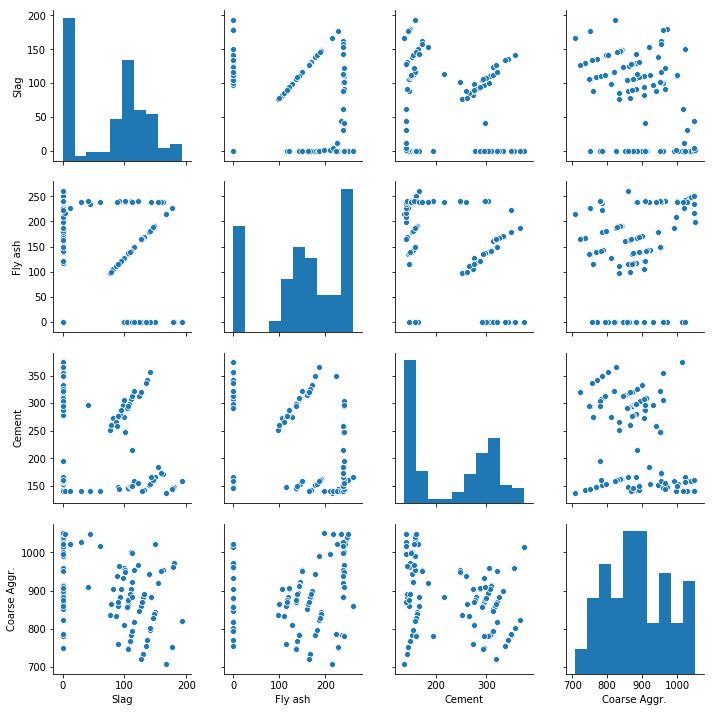

In [75]:
sns.pairplot(for_moltiple_data, vars=["Slag", "Fly ash", "Cement", "Coarse Aggr."])
plt.show() # SlagとFly ash、Cement、Coarse Aggr.との間に強いマルチコが確認された

In [71]:
df_scale_2 = df_scale.drop(["x6"], axis=1)
# 一番VIF値が高かったCoarse Aggr.を削除

,x1,x2,x3,x4,x5,x7,y
0,0.549165,0.066917,-0.517804,0.638098,0.164716,-0.945600,-0.134539
1,-0.852227,1.180482,0.493932,-0.853710,1.238496,0.101456,0.653913
2,-0.864967,1.163861,0.493932,-0.903437,2.670203,0.053862,0.739810
3,-0.864967,1.163861,0.482168,-0.903437,3.743983,0.022133,0.774425
4,-0.966886,0.565528,-0.058993,1.135368,0.522643,-1.294619,-1.181963
5,-1.056066,0.183260,-0.400160,0.240283,0.164716,1.418208,-1.388371
6,-0.992366,1.014278,0.340995,-1.450434,3.386057,-0.707633,0.361609
7,-1.081545,-1.295953,0.917450,2.129907,-0.909064,1.798955,0.070587
8,-0.992366,-1.295953,1.035093,0.339736,-0.909064,2.417670,-0.426844
9,0.944103,-1.295953,-0.106051,0.837006,-0.909064,-0.279292,0.310328


In [72]:
model2 = step_aic(smf.ols, ["x1", "x2", "x3", "x4", "x5", "x7"], ["y"], data=df_scale_2)

AIC: 294.301, formula: y ~ 1
AIC: 273.641, formula: y ~ x3
AIC: 284.304, formula: y ~ x2
AIC: 293.813, formula: y ~ x7
AIC: 289.419, formula: y ~ x4
AIC: 273.489, formula: y ~ x1
AIC: 296.154, formula: y ~ x5
AIC: 146.236, formula: y ~ x1 + x3
AIC: 268.457, formula: y ~ x1 + x2
AIC: 271.23, formula: y ~ x1 + x7
AIC: 257.126, formula: y ~ x1 + x4
AIC: 275.477, formula: y ~ x1 + x5
AIC: 130.08, formula: y ~ x1 + x3 + x2
AIC: 147.394, formula: y ~ x1 + x3 + x7
AIC: 116.55, formula: y ~ x1 + x3 + x4
AIC: 131.627, formula: y ~ x1 + x3 + x5
AIC: 97.284, formula: y ~ x1 + x3 + x4 + x2
AIC: 116.426, formula: y ~ x1 + x3 + x4 + x7
AIC: 105.19, formula: y ~ x1 + x3 + x4 + x5
AIC: 83.134, formula: y ~ x1 + x3 + x4 + x2 + x7
AIC: 89.819, formula: y ~ x1 + x3 + x4 + x2 + x5
AIC: 76.703, formula: y ~ x1 + x3 + x4 + x2 + x7 + x5
The best formula: y ~ x1 + x3 + x4 + x2 + x7 + x5


In [73]:
y3 = df_scale_2["y"]
X3 = df_scale[["x1", "x3", "x4", "x2", "x7", "x5"]]

mod3 = sm.OLS(y3, sm.add_constant(X3))
res3 = mod3.fit()
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     132.7
Date:                Thu, 20 Dec 2018   Prob (F-statistic):           3.34e-44
Time:                        14:21:47   Log-Likelihood:                -31.352
No. Observations:                 103   AIC:                             76.70
Df Residuals:                      96   BIC:                             95.15
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.776e-16      0.033  -8.29e-15      1.0

In [74]:
num_cols2 = mod3.exog.shape[1]
vifs = [variance_inflation_factor(mod3.exog, i) for i in range(0, num_cols2)]
pd.DataFrame(vifs, index=mod3.exog_names, columns=["VIF"])

,VIF
const,1.000000
x1,1.886804
x3,2.318386
x4,1.117704
x2,1.832936
x7,1.323080
x5,1.158483
